In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [4]:
voter_list = pd.read_csv('data/voterlist.txt', sep = "|", error_bad_lines = False)

b'Skipping line 4544618: expected 63 fields, saw 113\n'
/Users/bhuvesh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,18,19,20,48,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
plt.rcParams['figure.figsize'] = (9,6)
sns.set()

In [9]:
absent_list = pd.read_csv('data/1103/state.csv', error_bad_lines = False)

/Users/bhuvesh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,12,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
joined_df = absent_list.join(voter_list.set_index('REGISTRATION_NUMBER'), on='Voter Registration #')

In [18]:
joined_df.to_pickle('data/1103_joined.pkl')

In [19]:
joined_df.to_csv('data/1103_joined.csv', index=False)

In [3]:
joined_df = pd.read_pickle('data/1103_joined.pkl')

In [21]:
print(joined_df.columns.tolist())

['County', 'Voter Registration #', 'Last Name', 'First Name', 'Middle Name', 'Suffix', 'Street #', 'Street Name', 'Apt/Unit', 'City', 'State', 'Zip Code', 'Mailing Street #', 'Mailing Street Name', 'Mailing Apt/Unit', 'Mailing City', 'Mailing State', 'Mailing Zip Code', 'Application Status', 'Ballot Status', 'Status Reason', 'Application Date', 'Ballot Issued Date', 'Ballot Return Date', 'Ballot Style', 'Ballot Assisted', 'Challenged/Provisional', 'ID Required', 'Municipal Precinct', 'County Precinct', 'CNG', 'SEN', 'HOUSE\t', 'JUD', 'Combo #', 'Vote Center ID', 'Ballot ID', 'Post #', 'Party', 'COUNTY_CODE', 'VOTER_STATUS', 'LAST_NAME', 'FIRST_NAME', 'MIDDLE_MAIDEN_NAME', 'NAME_SUFFIX', 'NAME_TITLE', 'RESIDENCE_HOUSE_NUMBER', 'RESIDENCE_STREET_NAME', 'RESIDENCE_STREET_SUFFIX', 'RESIDENCE_APT_UNIT_NBR', 'RESIDENCE_CITY', 'RESIDENCE_ZIPCODE', 'BIRTHDATE', 'REGISTRATION_DATE', 'RACE', 'GENDER', 'LAND_DISTRICT', 'LAND_LOT', 'STATUS_REASON', 'COUNTY_PRECINCT_ID', 'CITY_PRECINCT_ID', 'CONGRE

In [20]:
joined_df.shape

(4505778, 101)

In [22]:
joined_df.RACE_DESC.unique()

array(['Black not of Hispanic Origin', 'White not of Hispanic Origin',
       'Unknown', nan, 'American Indian or Alaskan Native', 'Hispanic',
       'Other', 'Asian or Pacific Islander'], dtype=object)

In [4]:
clean_df = joined_df.dropna(subset=['RACE_DESC'])

In [5]:
clean_df2 = clean_df.dropna(subset=['GENDER'])

In [8]:
clean_df.to_pickle('data/1103_cleaned.pkl')

In [51]:
clean_df.to_csv('data/1103_cleaned.csv', index=False)

In [2]:
clean_df = pd.read_pickle('data/1103_cleaned.pkl')

In [7]:
clean_df = clean_df2.rename(columns={"Challenged/Provisional": "challenge", "Ballot Status": "bstatus"})

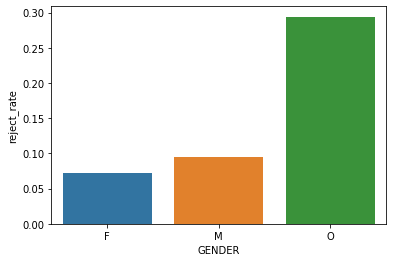

In [101]:
cols = ["GENDER"]
final_res = pd.DataFrame (columns = cols + ['accept', 'reject'])
grouped = clean_df.groupby(cols + ['challenge']).size()
for val in list(grouped.index.get_level_values(cols[0]).unique()):
    row = {cols[0] : val}
    try:
        row['accept'] = grouped[val]['NO']
    except:
        row['accept'] = 0
    try:
        row['reject'] = grouped[val]['YES']
    except:
        row['reject'] = 0
    final_res = final_res.append(row,ignore_index=True)
final_res['reject_rate'] = 100*final_res['reject']/(final_res['reject'] + final_res['accept'])
ax = sns.barplot(x=cols[0], y="reject_rate", data=final_res)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

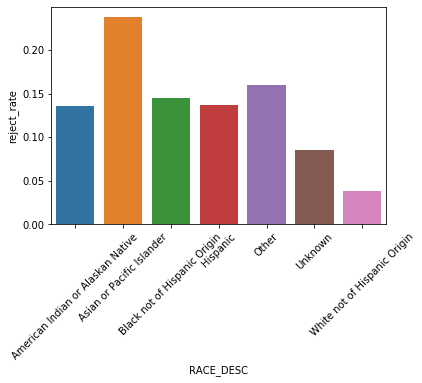

In [24]:
cols = ["RACE_DESC"]
final_res = pd.DataFrame (columns = cols + ['accept', 'reject'])
grouped = clean_df.groupby(cols + ['challenge']).size()
for val in list(grouped.index.get_level_values(cols[0]).unique()):
    row = {cols[0] : val}
    try:
        row['accept'] = grouped[val]['NO']
    except:
        row['accept'] = 0
    try:
        row['reject'] = grouped[val]['YES']
    except:
        row['reject'] = 0
    final_res = final_res.append(row,ignore_index=True)
final_res['reject_rate'] = (100*final_res['reject'])/((final_res['reject'] + final_res['accept']))
ax = sns.barplot(x=cols[0], y="reject_rate", data=final_res)
plt.xticks(rotation=45)

In [25]:
grouped

RACE_DESC                          challenge
American Indian or Alaskan Native  NO              7329
                                   YES               10
Asian or Pacific Islander          NO            115083
                                   YES              274
Black not of Hispanic Origin       NO           1195748
                                   YES             1733
Hispanic                           NO            114075
                                   YES              156
Other                              NO             70504
                                   YES              113
Unknown                            NO            293636
                                   YES              252
White not of Hispanic Origin       NO           2387450
                                   YES              930
dtype: int64

In [12]:
final_res

,RACE_DESC,accept,reject,reject_rate
0,American Indian or Alaskan Native,7329,10,0.136258
1,Asian or Pacific Islander,115083,274,0.237524
2,Black not of Hispanic Origin,1195748,1733,0.14472
3,Hispanic,114075,156,0.136565
4,Other,70504,113,0.160018
5,Unknown,293636,252,0.085747
6,White not of Hispanic Origin,2387450,930,0.0389385


In [17]:
grouped = clean_df.groupby(cols + ['Application Status']).size()

In [18]:
grouped

RACE_DESC                          Application Status
American Indian or Alaskan Native  A                        7316
                                   R                          23
Asian or Pacific Islander          A                      114425
                                   R                         932
Black not of Hispanic Origin       A                     1192027
                                   R                        5454
Hispanic                           A                      113771
                                   R                         460
Other                              A                       70380
                                   R                         237
Unknown                            A                      293143
                                   R                         745
White not of Hispanic Origin       A                     2385068
                                   R                        3312
dtype: int64

In [30]:
def reduce_join(df, columns):
    assert len(columns) > 1
    slist = [df[x].astype(str) for x in columns]
    return reduce(lambda x, y: x + '_' + y, slist[1:], slist[0])

In [31]:
cols = ["RACE_DESC","GENDER"]
clean_df['pop_type'] = reduce_join(clean_df, cols)

In [38]:
final_res = pd.DataFrame (columns =  ['pop_type','accept', 'reject'])
grouped = clean_df.groupby(['pop_type','challenge']).size()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

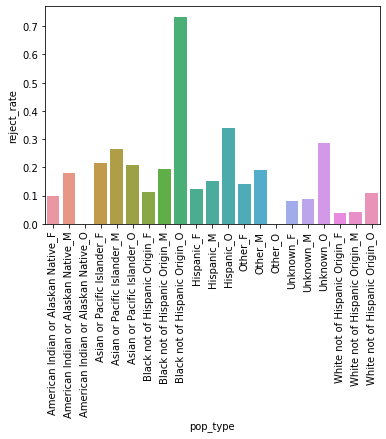

In [40]:
for val in list(grouped.index.get_level_values('pop_type').unique()):
    row = {'pop_type' : val}
    try:
        row['accept'] = grouped[val]['NO']
    except:
        row['accept'] = 0
    try:
        row['reject'] = grouped[val]['YES']
    except:
        row['reject'] = 0
    final_res = final_res.append(row,ignore_index=True)
final_res['reject_rate'] = (100*final_res['reject'])/((final_res['reject'] + final_res['accept']))
ax = sns.barplot(x='pop_type', y="reject_rate", data=final_res)
plt.xticks(rotation=90)

In [41]:
grouped

pop_type                             challenge
American Indian or Alaskan Native_F  NO              4001
                                     YES                4
American Indian or Alaskan Native_M  NO              3313
                                     YES                6
American Indian or Alaskan Native_O  NO                15
Asian or Pacific Islander_F          NO             62331
                                     YES              134
Asian or Pacific Islander_M          NO             52273
                                     YES              139
Asian or Pacific Islander_O          NO               479
                                     YES                1
Black not of Hispanic Origin_F       NO            734683
                                     YES              833
Black not of Hispanic Origin_M       NO            459577
                                     YES              889
Black not of Hispanic Origin_O       NO              1488
                         

In [43]:
clean_df[clean_df['GENDER']=='O' and clean_df['challenge']=='YES'].head()

,County,Voter Registration #,Last Name,First Name,Middle Name,Suffix,Street #,Street Name,Apt/Unit,City,...,MAIL_HOUSE_NBR,MAIL_STREET_NAME,MAIL_APT_UNIT_NBR,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,MAIL_ADDRESS_2,MAIL_ADDRESS_3,MAIL_COUNTRY,pop_type
5508,APPLING,12523272,HARDEE,TRIPP,AUSTIN,NaN,66,ANTHONY ST,,BAXLEY,...,NaN,66 ANTHONY,NaN,"BAXLEY,GEORGIA,31513",NaN,NaN,NaN,NaN,US,White not of Hispanic Origin_O
6140,APPLING,12654075,CONAWAY,ROMANSKI,DERRIQUE,JR,529,MILES RD,,BAXLEY,...,529,MILES RD,NaN,BAXLEY,GA,31513,NaN,NaN,NaN,Unknown_O
6265,APPLING,11097142,MEDLIN,CHRISTOPHER,SNOW,NaN,378,FAIR ST,,BAXLEY,...,378,FAIR ST,NaN,BAXLEY,GA,31513,NaN,NaN,NaN,White not of Hispanic Origin_O
7107,ATKINSON,584045,WILSON,DONNA,PETRELL,NaN,356,HERITAGE HILL RD,,WILLACOOCHEE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black not of Hispanic Origin_O
7198,ATKINSON,11955817,MATHEWS,JORDAN,ARIANNA,NaN,1941,COGDELL HWY,,PEARSON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White not of Hispanic Origin_O


In [44]:
clean_df[clean_df['challenge']=='YES'].head()

,County,Voter Registration #,Last Name,First Name,Middle Name,Suffix,Street #,Street Name,Apt/Unit,City,...,MAIL_HOUSE_NBR,MAIL_STREET_NAME,MAIL_APT_UNIT_NBR,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,MAIL_ADDRESS_2,MAIL_ADDRESS_3,MAIL_COUNTRY,pop_type
44724,BARROW,3559317,CRUCERU,MARIAN,NaN,NaN,1910,E BAY ST,,HOSCHTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White not of Hispanic Origin_M
57963,BARROW,11386452,STONE,ANNA,LEE,NaN,308,HARRISON LN,,WINDER,...,308,HARRISON LN,NaN,WINDER,GA,30680,NaN,NaN,NaN,White not of Hispanic Origin_F
61603,BARROW,12158207,AYESU,ERIC,NaN,NaN,1506,FARMINGTON WAY,APT 111,WINDER,...,1506,FARMINGTON WAY,APT 111,WINDER,GA,3.06805e+08,NaN,NaN,NaN,Black not of Hispanic Origin_M
73165,BARTOW,11997524,WATERS,JAMES,DAVID,NaN,62,BISHOP MILL DR NW,,CARTERSVILLE,...,62,BISHOP MILL DR NW,NaN,CARTERSVILLE,GA,3.01218e+08,NaN,NaN,NaN,Other_M
73185,BARTOW,12450709,JIMENEZ,KEILA,NaN,NaN,25,MOCKINGBIRD DR,,CARTERSVILLE,...,NaN,PO BOX 4118,NaN,CARTERSVILLE,GA,3.01202e+08,NaN,NaN,NaN,Hispanic_F


In [46]:
clean_df[clean_df['Application Status']=='A'].head()

,County,Voter Registration #,Last Name,First Name,Middle Name,Suffix,Street #,Street Name,Apt/Unit,City,...,MAIL_HOUSE_NBR,MAIL_STREET_NAME,MAIL_APT_UNIT_NBR,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,MAIL_ADDRESS_2,MAIL_ADDRESS_3,MAIL_COUNTRY,pop_type
0,APPLING,4670838,HUGHES,MABLE,J,NaN,623,RED DOT RD,APT 1,BAXLEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black not of Hispanic Origin_F
1,APPLING,651532,HARPER,RANZE,N,NaN,1602,DUPE HERNDON RD,,SURRENCY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White not of Hispanic Origin_M
2,APPLING,650195,NEWKIRK,CLISTEN,NaN,NaN,133,POOR ROBIN RD,,BAXLEY,...,NaN,PO BOX 519,NaN,BAXLEY,GA,315150051,NaN,NaN,NaN,Black not of Hispanic Origin_F
3,APPLING,4502220,ROBERTS,JENNIFER,GRACE,NaN,670,GRAHAM ZOAR RD,,BAXLEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White not of Hispanic Origin_F
4,APPLING,8131824,NAILS,VERNON,DEON,NaN,3452,PINEY BLUFF RD,,BAXLEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black not of Hispanic Origin_M


In [47]:
grouped_2 = clean_df.groupby(['County', 'Application Status']).size()

County     Application Status
APPLING    A                      6580
ATKINSON   A                      2232
BACON      A                      4133
BAKER      A                      1203
BALDWIN    A                     16433
                                 ...  
WHITFIELD  A                     25413
WILCOX     A                      2316
WILKES     A                      4057
WILKINSON  A                      3107
WORTH      A                      6169
Length: 230, dtype: int64
